<a href="https://colab.research.google.com/github/Arseniy-Polyakov/speech_technologies_course/blob/main/HW_2_Spectral_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Чтение и запись .wav-файлов

In [1]:
import numpy as np
import scipy.io.wavfile as wavfile
import matplotlib.pyplot as plt

In [2]:
# библиотека scipy

samplerate, signal = wavfile.read("sample.wav")

In [3]:
# сгенерируем синусоидальную волну и запишем её в .wav-файл

samplerate = 22050
time_in_seconds = 2
num_samples = samplerate * time_in_seconds
ampl = 2 ** 14

sine = np.round(ampl * np.sin(np.arange(num_samples) / 20)).astype(np.int16)
wavfile.write("output.wav", samplerate, sine)

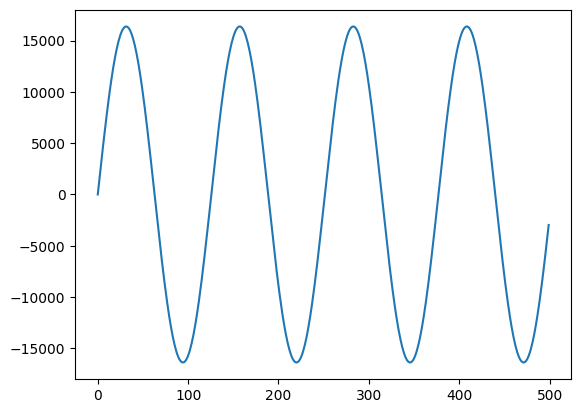

In [4]:
# посмотрим на первые 500 отсчётов синусоиды
plt.plot(sine[:500])

2. Обработка сигнала

In [5]:
import numpy as np
import scipy.io.wavfile as wavfile
from scipy.fft import fft
import matplotlib.pyplot as plt

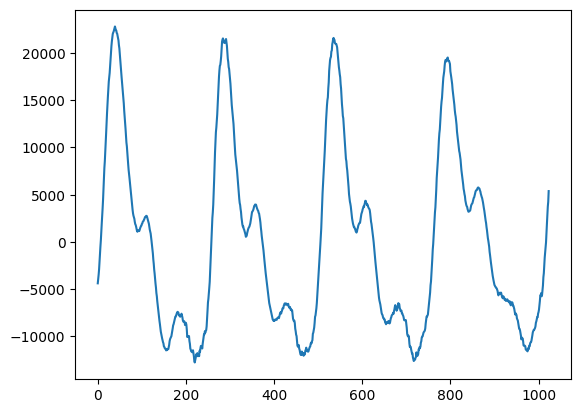

In [6]:
# прочитаем сигнал из файла
samplerate, signal = wavfile.read("sample.wav")
frame_len_samples = 1024
offset = 4000
# возьмём окно длиной 1024 отсчёта, начиная с отсчёта номер 4000
frame = signal[offset:offset + frame_len_samples]
# изобразим на графике
plt.plot(frame)

А чему это равно в секундах?

In [7]:
print("Длина окна в секундах =", frame_len_samples / samplerate)
print("От начала сигнала мы отступили на ", offset / samplerate, "секунд")

Длина окна в секундах = 0.032
От начала сигнала мы отступили на  0.125 секунд


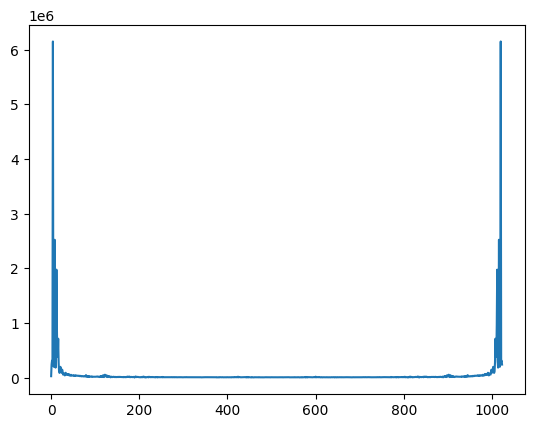

In [8]:
# вычислим спектр с помощью быстрого преобразования Фурье, не забыв взять модуль
spec = np.abs(fft(frame))
# изобразим на графике
plt.plot(spec)

Так как мы работали с дискретным сигналом, то спектр получился тоже дискретный. В нём столько же отсчётов, сколько было в исходном фрагменте сигнала (1024). Но левая половина спектра повторяет правую.

Посмотрим только на левую половину спектра:

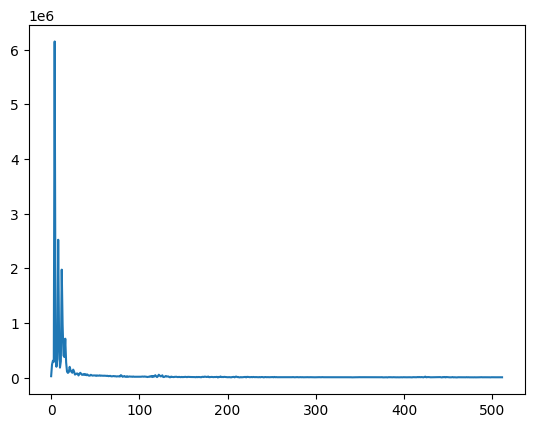

In [9]:
plt.plot(spec[:frame_len_samples // 2])

Она охватывает частоты от 0 до частоты Найквиста. А чему она равна?

In [10]:
print("Nyquist frequency =", samplerate // 2)

Nyquist frequency = 16000


Обратите внимание, что числа, отложенные по оси X, - это номера отсчётов, а не значения частот!

А если мы хотим смотреть на частоты до 5000 Гц? Разберёмся, как соотносятся номера отсчётов и соответствующие им частоты.

In [11]:
cutoff_freq = 5000
cutoff_sample = int((cutoff_freq / samplerate) * frame_len_samples)
print(cutoff_sample) # это номер отсчёта, соответствующего частоте 5000 Гц

160


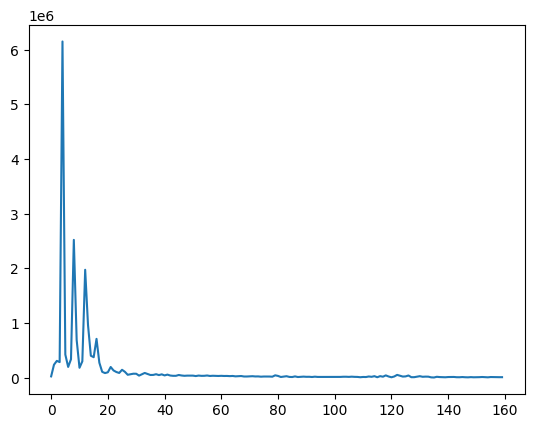

In [12]:
plt.plot(spec[:cutoff_sample])

Бонус: сделаем так, чтобы по оси X были отложены частоты, а не номера отсчётов, и сделаем ось Y логарифмической.

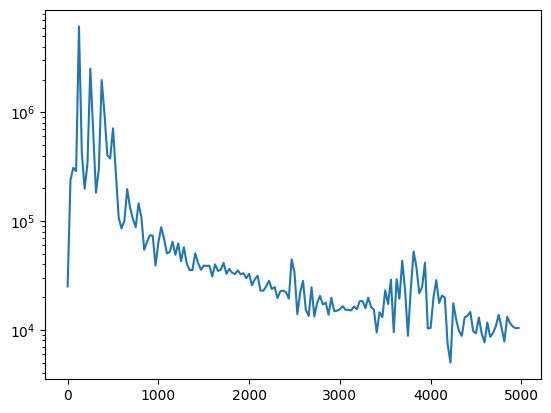

In [13]:
freqs = [samplerate * i / frame_len_samples for i in range(cutoff_sample)]
plt.yscale("log")
plt.plot(freqs, spec[:cutoff_sample])

Задание: найти в файлах фонетически представительного текста гласный звук, сонорный согласный звук и шумный согласный звук. Внутри каждого из них выбрать точку, а затем программным образом изобразить спектр для каждого из них и сохранить получившиеся картинки.  
Задание со звёздочкой: изобразить LTAS (усреднённый спектр) для одного файла ФПТ, обработав его оконным методом.

Содержание файла sample.wav (Был тихий серый вечер).
Гласный звук: [е] - серый
Сонорный согласный звук: [л] - был
Шумный согласный звук: [x] - тихий

In [27]:
import librosa
import matplotlib.pyplot as plt
import numpy as np

In [28]:
audio_file = '/content/sample.wav'
y, sr = librosa.load(audio_file)

Спектр сонорного звука

In [29]:
def plot_spectrum(y_segment, sr):
    n_fft = 2048
    window_size = int(sr * 0.01)

    D = librosa.stft(y_segment, n_fft=n_fft, hop_length=window_size)
    magnitude = np.abs(D)
    log_magnitude = librosa.amplitude_to_db(magnitude)

    plt.figure(figsize=(10, 4))
    librosa.display.specshow(log_magnitude, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Спектральная картина сегмента')
    plt.tight_layout()
    return plt.gcf()

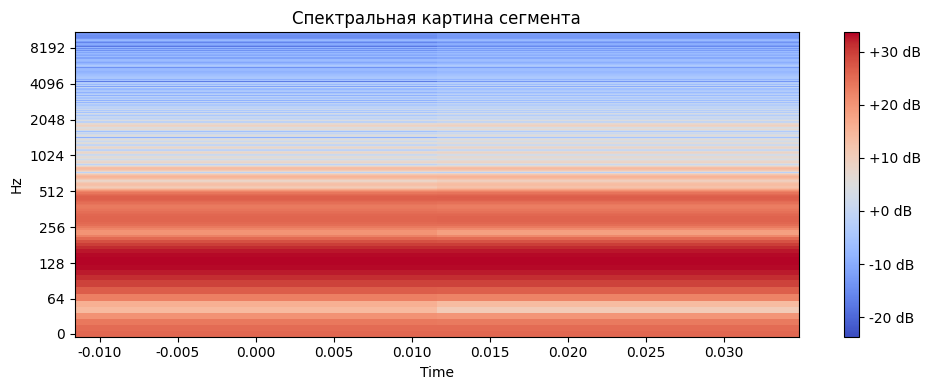

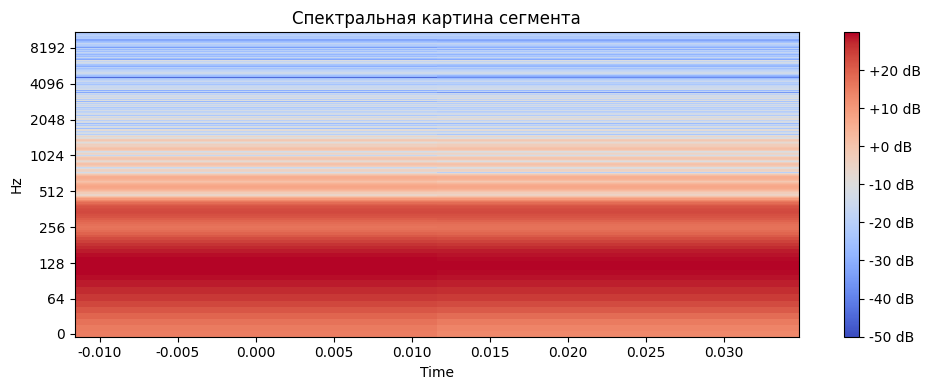

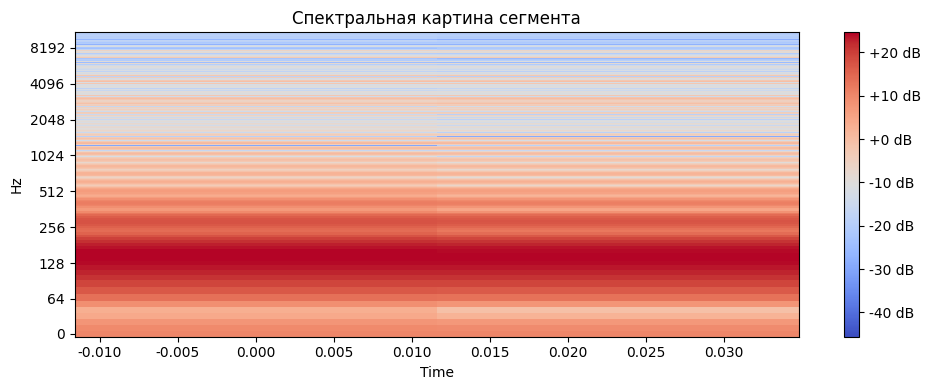

In [30]:
vowel_start_time = 0.724  # [е]
sonorant_start_time = 0.169 # [л]
noisy_start_time = 0.374 # [x]

segment_duration = 0.01

vowel_segment = y[int(vowel_start_time*sr):int((vowel_start_time + segment_duration)*sr)]
sonorant_segment = y[int(sonorant_start_time*sr):int((sonorant_start_time + segment_duration)*sr)]
noisy_segment = y[int(noisy_start_time*sr):int((noisy_start_time + segment_duration)*sr)]

fig_vowel = plot_spectrum(vowel_segment, sr)
fig_sonorant = plot_spectrum(sonorant_segment, sr)
fig_noisy = plot_spectrum(noisy_segment, sr)

График спектра гласного звука имеет ярко выраженный резонанс на низких частотах, поскольку гласные характеризуются четкими формантами.

У сонорного звука спектр также показывает заметные резонансные частоты (однако менее яркие на низких частотах по сравнению с гласными).

Шумный звук обладает широким распределением энергии по всему диапазону частот, отражающим хаотичность шума.